**The steps we will follow in these analysis are as follow:**
   1. Reading and Understanding the Data
   2. Visualising Data fot better insights.
   3. Preparing Data for Modelling (Train-Test Split, Rescaling)
   4. Training the Model.
   5. Plotting and Various Metrics Analysis
   6. Prediction and evaluation on Test Data Set.

<font color = red> **We are trying to Predict a Lead Score between 0 and 100 to each of the leads Which can be used by the company to target potential leads** </font> 

### <font color = blue> 1. Reading and Understanding the Data  </font>

**Importing Important Libraries to read lead scoring data set**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline



In [2]:
## Dataframe with all predictor variables

score = pd.read_csv("Leads.csv")

In [3]:
## Let's see the head of our dataset

score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## Let's Check the dimension of our dataframe

score.shape

(9240, 37)

In [5]:
## Let's look at the statistical demo of dataframe

score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
## Checking the type of each column

score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### <font color = blue> 2. Data Analysis and Visualisation  </font>

**Data Cleaning Treatment**

In [7]:
## Check for the duplicates ID

sum(score.duplicated(subset = 'Prospect ID'))==0

True

**NOTE:** All the Prospect Id in the Data Frame contains unique values.

Prospect Id and Lead Number are two variables which indicates the lead of contacted people and we can drop it as it will hamper our analysis Process.

In [8]:
## Dropping Lead Number and prospect Id 

score.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [9]:
## As we can observe that there are select values for may column.
## This is because customer did not select any option from the list, hence it shows select.
## we can consider select value as null values

## converting "Select" values to NaN

score = score.replace('Select', np.nan)

In [10]:
## Checking missing values

print(score.isnull().sum())
print(score.isnull().values.any())
print(score.isnull().values.sum())

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
## Converting missing values in percentage form

round((score.isnull().sum()/len(score))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**Note:** <font color = red> Missing values Presence is too high so we will drop the features which is having more than 30% missing values. </font> 

In [12]:
## Dropping columns with more than 30% missing values

columns = ['Specialization','How did you hear about X Education', 'Lead Quality', 
           'Lead Profile', 'Asymmetrique Activity Index', 'Tags', 'City',
           'Asymmetrique Profile Index','Asymmetrique Activity Score',
           'Asymmetrique Profile Score']
len(columns)

10

<font color=green> **We are dropping 10 columns that have more than 30% of missing Values** </font>

In [13]:
## Dropping columns and storing Dataframe in new Variables

lead_score = score.drop(['Specialization','How did you hear about X Education', 'Lead Quality', 
           'Lead Profile', 'Asymmetrique Activity Index', 'Tags', 'City',
           'Asymmetrique Profile Index','Asymmetrique Activity Score',
           'Asymmetrique Profile Score'], axis=1)

In [14]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [15]:
##Checking again missing value percentage

round((lead_score.isnull().sum()/len(score))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**Numerical Analysis**

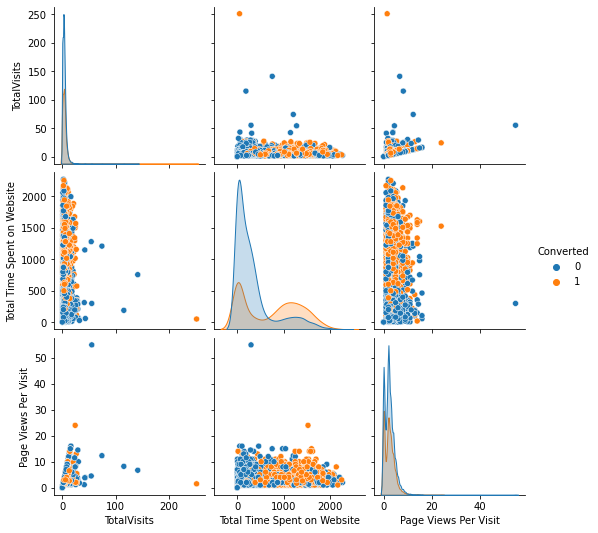

In [16]:
## Visualising the numerics feature 

sns.pairplot(lead_score, diag_kind='kde', hue='Converted')
plt.show()

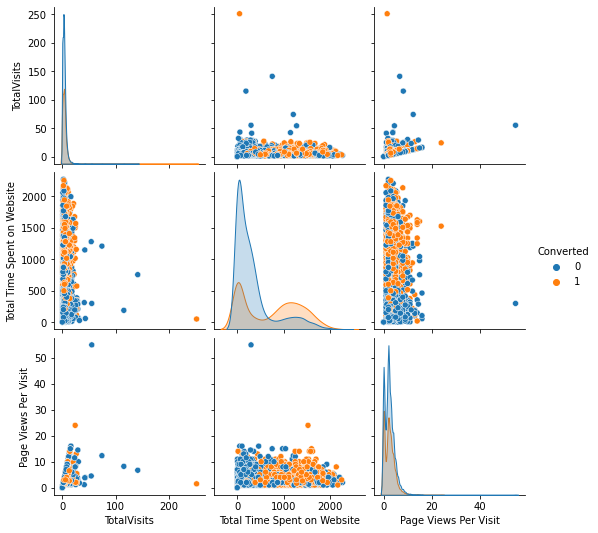

In [17]:
## for Converted i.e 1

edu = lead_score[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
sns.pairplot(edu, diag_kind='kde', hue='Converted')
plt.show()

In [18]:
## Getting a dataframe

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transedu = pd.DataFrame(pt.fit_transform(edu))
transedu.columns = edu.columns
transedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


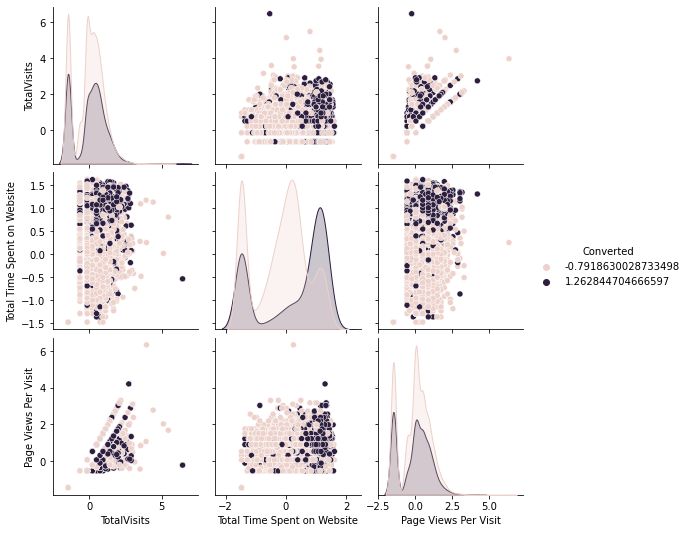

In [19]:
## visualisation for transedu

sns.pairplot(transedu, diag_kind='kde', hue='Converted', kind='scatter')
plt.show()

**Inferences**
   - Total Visits and Page Views Per Visit seems to be a hot lead convertor variable.

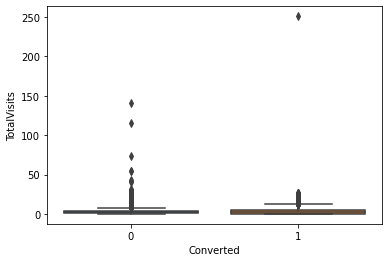

In [20]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)
plt.show()

**Inference**

- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

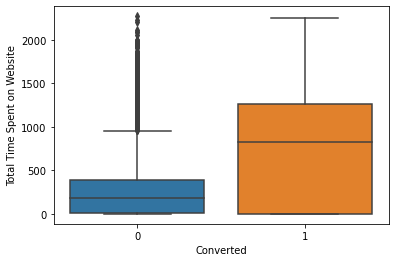

In [21]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_score.Converted, y=lead_score['Total Time Spent on Website'])
plt.show()

**Infrences**
   - Leads spending more time on the website are more likely to be converted.
   - Website should be made more engaging to make leads spend more time.

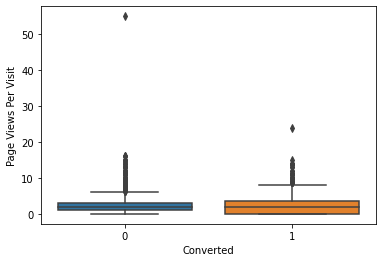

In [22]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead_score.Converted,y=lead_score['Page Views Per Visit'])
plt.show()

**Inferences**
   - Median for converted and unconverted leads is the same.
   - Nothing can be said specifically for lead conversion from Page Views Per Visit

**Categorical Analysis**

In [23]:
## Checking the value of country columns

lead_score.Country.value_counts(normalize=True, dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Germany                 0.000433
Nigeria                 0.000433
Canada                  0.000433
Sweden                  0.000325
Ghana                   0.000216
China                   0.000216
Netherlands             0.000216
Bangladesh              0.000216
Asia/Pacific Region     0.000216
Belgium                 0.000216
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Tanzania                0.000108
Russia    

As we see customers from India are 70% and 27% Values are null values in country column

**Note:** Imputing missing Values by most occurence value "India" in country Column

In [24]:
## Imputing Missing Values

lead_score.Country = lead_score.Country.fillna(lead_score.Country.mode()[0])

In [25]:
## Checking again Missing Values

lead_score.Country.value_counts(normalize=True, dropna=False)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Germany                 0.000433
Nigeria                 0.000433
South Africa            0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
Ghana                   0.000216
Uganda                  0.000216
Netherlands             0.000216
Philippines             0.000216
Belgium                 0.000216
Italy                   0.000216
China                   0.000216
Asia/Pacific Region     0.000216
Bangladesh              0.000216
Tanzania                0.000108
Sri Lanka               0.000108
Liberia   

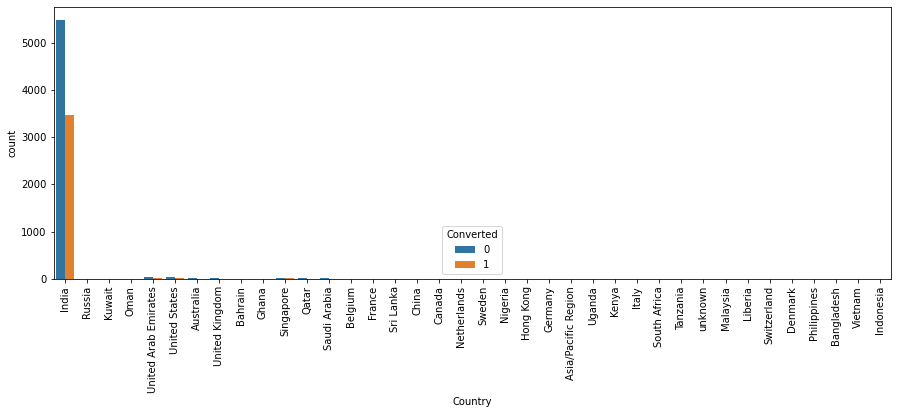

In [26]:
## Visualising the Country column

plt.figure(figsize=(15,5))
plot = sns.countplot(lead_score.Country, hue=lead_score.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

   - As we can see the Number of Values for India are quite high(nearly 97%), we can drop this column easily

In [27]:
## Dropping 'Country Coloumn'

lead_score = lead_score.drop(['Country'], axis=1)

### Imputing Missing values in city column with most occurence categorical value



In [28]:
## Checking Missing Value Percentage

round((lead_score.isnull().sum()/len(score))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [29]:
## Checking with Occupation Column

lead_score['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [30]:
## Imputing NaN values with 'Unemployed' Value

lead_score['What is your current occupation'] = lead_score['What is your current occupation'].fillna(lead_score['What is your current occupation'].mode()[0])

In [31]:
## Checking the values

lead_score['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

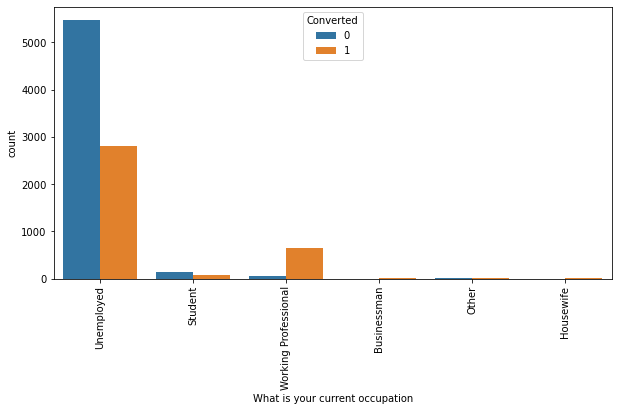

In [32]:
## Visualising the occupation column

plt.figure(figsize=(10,5))
plot = sns.countplot(lead_score['What is your current occupation'], hue=lead_score.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

   - Working Professionals are higher in term of hot leads
   - Unemployed leads are the most

In [33]:
## Checking value counts

lead_score['Lead Source'].value_counts().head(5)

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

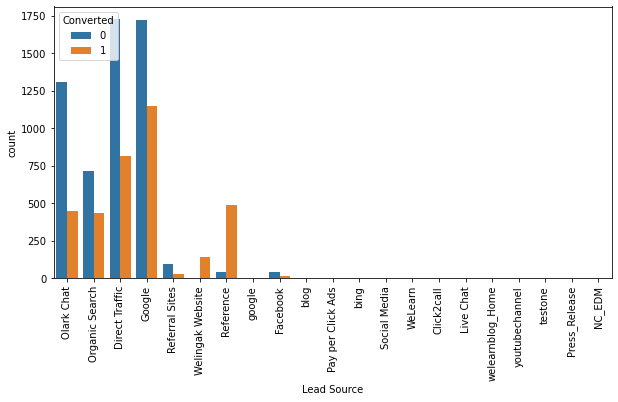

In [34]:
## Visualising for lead source

plt.figure(figsize=(10,5))
plot = sns.countplot(lead_score['Lead Source'], hue=lead_score.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

**Inferences:-**

  - Maximum number of leads are generated by Google and Direct traffic.
  - Conversion Rate of reference leads and leads through welingak website is high.
  - To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organics               search,direct traffic, and google leads and generate more leads from reference and welingak website.

In [35]:
## Checking Value Counts

lead_score['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [36]:
## Checking Value counts

lead_score['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [37]:
## Checking Value counts

lead_score['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [38]:
## Checking Value counts

lead_score['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

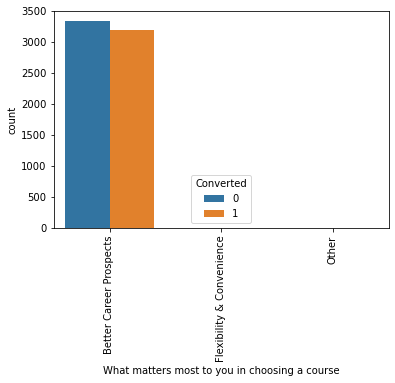

In [39]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead_score['What matters most to you in choosing a course'], hue=lead_score.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
#Lead Origin

lead_score['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

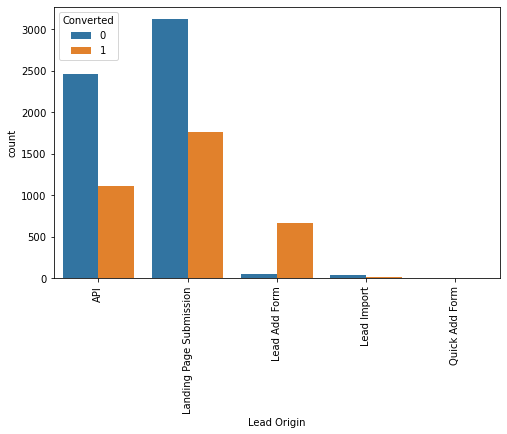

In [41]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(lead_score['Lead Origin'], hue=lead_score.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Inference**
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [42]:
## Checking Columns of missing values

MissingValues={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed',
               'What matters most to you in choosing a course':'Better Career Prospects'}

In [43]:
## Imputing columns of missing Values

lead_score=lead_score.fillna(value=MissingValues)

In [44]:
## Checking Missing Values

lead_score.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

**All Missing Values are Imputed through their statistical values**

In [45]:
## Checking Info

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [46]:
# Mapping to Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

lead_score['Do Not Email']=lead_score['Do Not Email'].map(category)

lead_score['Do Not Call']=lead_score['Do Not Call'].map(category)

lead_score['Search']=lead_score['Search'].map(category)

lead_score['Magazine']=lead_score['Magazine'].map(category)

lead_score['Newspaper Article']=lead_score['Newspaper Article'].map(category)

lead_score['X Education Forums']=lead_score['X Education Forums'].map(category)

lead_score['Newspaper']=lead_score['Newspaper'].map(category)

lead_score['Digital Advertisement']=lead_score['Digital Advertisement'].map(category)

lead_score['Through Recommendations']=lead_score['Through Recommendations'].map(category)

lead_score['Receive More Updates About Our Courses']=lead_score['Receive More Updates About Our Courses'].map(category)

lead_score['Update me on Supply Chain Content']=lead_score['Update me on Supply Chain Content'].map(category)

lead_score['Get updates on DM Content']=lead_score['Get updates on DM Content'].map(category)



In [47]:
 #Dropping some other redundant columns like I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['I agree to pay the amount through cheque','A free copy of Mastering The Interview']

lead_score=lead_score.drop(red_cols,1)

In [48]:
## Again Checking data contents

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [49]:
# Creating a dummy variables for 8 categories and dropping the first level.

Dummy=pd.get_dummies(lead_score[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to the original dataset

lead_score=pd.concat([lead_score,Dummy],axis=1)

lead_score.shape

(9240, 84)

In [50]:
# dropping duplicate dummies

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


lead_score=lead_score.drop(duplicates,1)

lead_score.shape

(9240, 78)

In [51]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']
lead_score=lead_score.drop(redundant,1)

In [52]:
# Converting some categories to numercial as they are imported as an 'Object'

lead_score[['TotalVisits','Page Views Per Visit']]=lead_score[['TotalVisits','Page Views Per Visit']].astype('float')

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

# Check outliers

In [53]:
## Description of numerical Data

lead_score.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


   - 'TotalVisits' and 'Page Views Per Visit' are the outliers.  We could visualize them through boxplot for better understanding

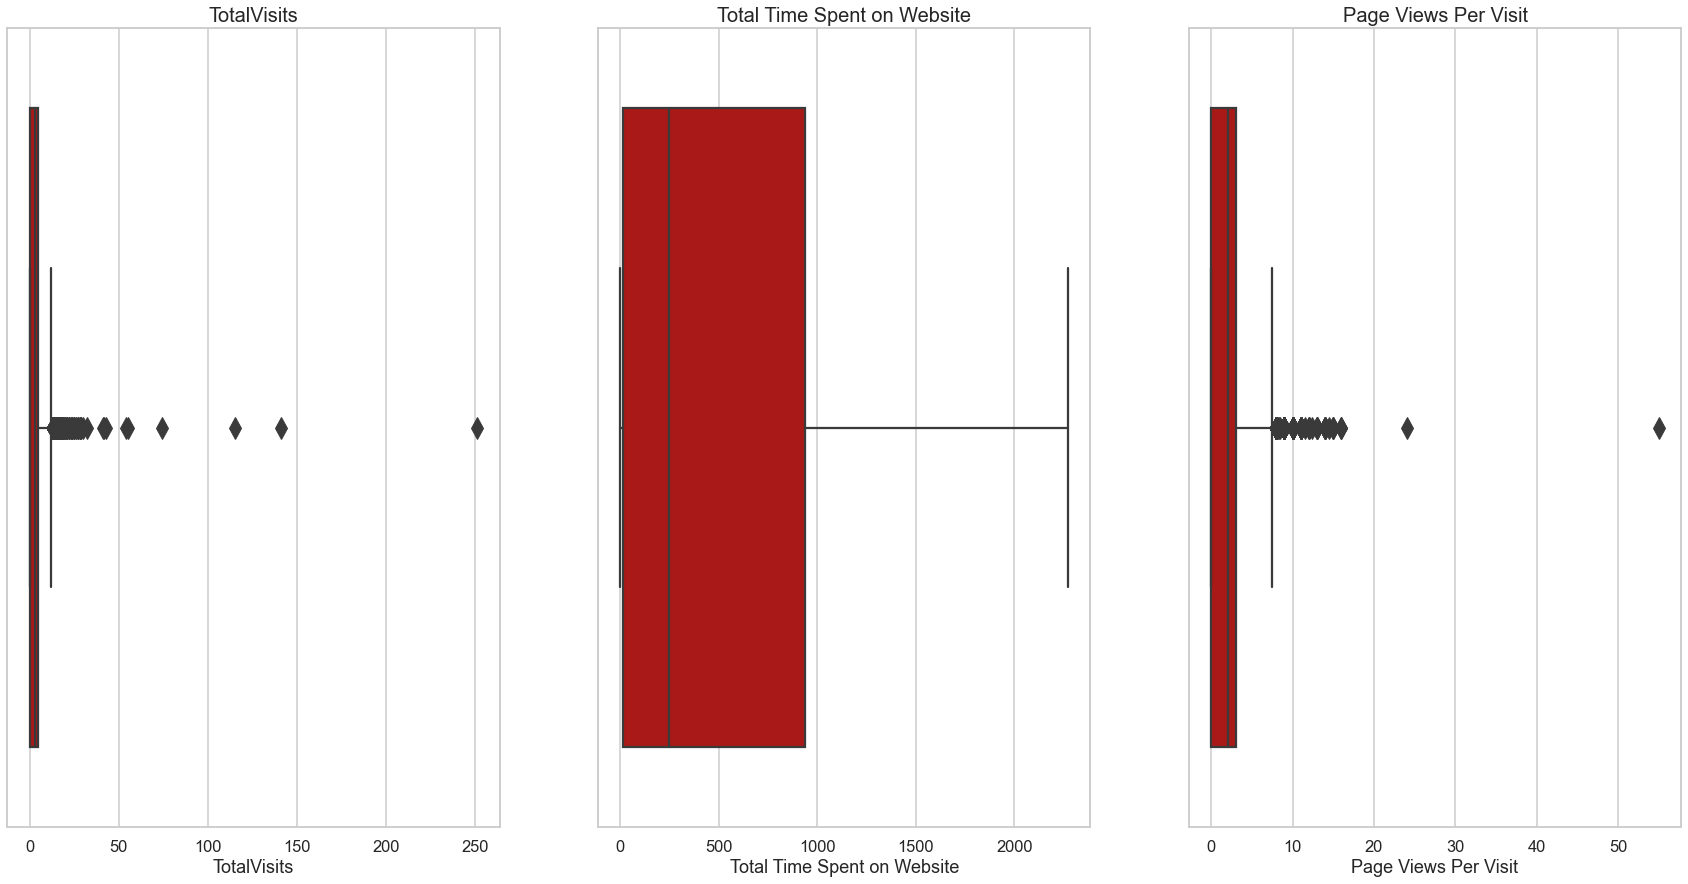

In [54]:
## Visualising the outliers

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')
# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=lead_score[col[i]],data=lead_score,palette='gist_heat',orient='v',fliersize=15) 

   - Its clear that 'TotalVisits' and 'Page Views Per Visit' are the outliers.  Instead of deleting them which could create problems we will create bins.

In [55]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    lead_score[list(ranges_total_visits.keys())[i]]=lead_score['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [56]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits_1.keys()))):
    lead_score[list(ranges_total_visits_1.keys())[i]]=lead_score['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)


In [57]:
#some more redundant columns are removed

redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

lead_score=lead_score.drop(redundant,axis=1)

lead_score.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### <font color = blue> 3. Data Preparation for Modelling  </font>

#### Train-test split

In [58]:
# Separating target varaible from dependent variable

y=lead_score['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

X=lead_score.drop('Converted',1)

In [59]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
## Checking Train data

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,487,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,106,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1230,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### Standardization of feature

In [61]:
scaler=StandardScaler()


X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [62]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

### <font color = blue> 4. Training the Model  </font>

In [63]:
## Import stats Model

import statsmodels.api as sm

In [64]:
## Importing LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [66]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=X_train.columns[rfe.support_]

X_train_1=sm.add_constant(X_train[col])    # Adding constant

### Model 1

In [67]:
## Building Model #1

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.1
Date:                Mon, 17 May 2021   Deviance:                       5396.2
Time:                        20:01:11   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0729      0.068      1.071      0.284      -0.060       0.206
Do Not Email                                            -1.2466      0.195     -6.387      0.000      -1.629      -0.864
Total Time Spent on Website                              1.1002      0.039     27.997      0.000       1.023       1.177
Lead Origin_Lead Add Form                                3.7950      0.191     19.905      0.000       3.421       4.169
Lead Source_Olark Chat                                   1.1718      0.102     11.457      0.000       0.971       1.372
Lead Source_Welingak Website                             1.9692      0.744      2.647      0.008       0.511       3.427
Last Activity_Email Bounced                             -1.0898      0.347     -3.139      0.002      -1.770      -0.409
Last Activity_Olark Chat Conversation                   -1.0933      0.192     -5.692      0.000      -1.470      -0.717
What is your current occupation_Housewife               22.9736   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.7611      0.187     14.792      0.000       2.395       3.127
Last Notable Activity_Email Link Clicked                -1.9010      0.272     -6.982      0.000      -2.435      -1.367
Last Notable Activity_Email Opened                      -1.3147      0.087    -15.160      0.000      -1.485      -1.145
Last Notable Activity_Had a Phone Conversation           2.1462      1.099      1.952      0.051      -0.008       4.301
Last Notable Activity_Modified                          -1.8200      0.096    -19.049      0.000      -2.007      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5720      0.373     -4.218      0.000      -2.302      -0.842
Last Notable Activity_Page Visited on Website           -1.5801      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

   - Summary shows that there are features with high p -values, we will drop them one at a time until we get a significant p-values

### VIF calculations

In [68]:
#importing of VIF library to check multi collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Creating vif dataframe contain all variables and their respective vif's value

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_1[col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.66
12,Last Notable Activity_Modified,1.55
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
8,What is your current occupation_Working Profes...,1.14


   - None of them have VIF more than 5. There is no multicollinearity issue this data set

In [70]:
#Dropping the values with high p, which is insignificant i,e. Constant and What is your current occupation_Housewife

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

### Model 2

In [71]:
## Building Model #2

X_train_2=sm.add_constant(X_train_2)                              
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  
reg2=logis2.fit()                                                 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13905
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Mon, 17 May 2021   Deviance:                       897.26
Time:                        20:01:11   Pearson chi2:                     897.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4986      0.010     48.322      0.000       0.478       0.519
Do Not Email                                            -0.1507      0.023     -6.646      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1879      0.005     36.249      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5593      0.020     28.110      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1697      0.014     12.021      0.000       0.142       0.197
Lead Source_Welingak Website                             0.1937      0.043      4.456      0.000       0.109       0.279
Last Activity_Email Bounced                             -0.0598      0.033     -1.836      0.066      -0.124       0.004
Last Activity_Olark Chat Conversation                   -0.1263      0.020     -6.293      0.000      -0.166      -0.087
What is your current occupation_Working Professional     0.3445      0.018     19.032      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3059      0.036     -8.585      0.000      -0.376      -0.236
Last Notable Activity_Email Opened                      -0.2215      0.013    -17.341      0.000      -0.247      -0.196
Last Notable Activity_Had a Phone Conversation           0.2408      0.113      2.134      0.033       0.020       0.462
Last Notable Activity_Modified                          -0.2961      0.013    -22.814      0.000      -0.322      -0.271
Last Notable Activity_Olark Chat Conversation           -0.2799      0.040     -7.036      0.000      -0.358      -0.202
Last Notable Activity_Page Visited on Website           -0.2684      0.026    -10.205      0.000      -0.320      -0.217
========================================================================================================================
"""

   - 'Last Activity_Email Bounced' has high P value which is insignificant, will drop it.  There is no further need to generate VIF as the values are below 5.

In [72]:
## dropping variable

X_train_3=X_train_2.drop(['Last Activity_Email Bounced'],axis=1)

### Model 3

In [73]:
## Building Model #3

X_train_3=sm.add_constant(X_train_3)                                
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    
reg3=logis3.fit()                                                   
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13910
Method:                          IRLS   Log-Likelihood:                -2791.3
Date:                Mon, 17 May 2021   Deviance:                       897.73
Time:                        20:01:11   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4998      0.010     48.524      0.000       0.480       0.520
Do Not Email                                            -0.1765      0.018     -9.906      0.000      -0.211      -0.142
Total Time Spent on Website                              0.1877      0.005     36.208      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5592      0.020     28.102      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1687      0.014     11.959      0.000       0.141       0.196
Lead Source_Welingak Website                             0.1951      0.043      4.487      0.000       0.110       0.280
Last Activity_Olark Chat Conversation                   -0.1225      0.020     -6.135      0.000      -0.162      -0.083
What is your current occupation_Working Professional     0.3447      0.018     19.040      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3067      0.036     -8.606      0.000      -0.377      -0.237
Last Notable Activity_Email Opened                      -0.2225      0.013    -17.429      0.000      -0.247      -0.197
Last Notable Activity_Had a Phone Conversation           0.2398      0.113      2.124      0.034       0.019       0.461
Last Notable Activity_Modified                          -0.2996      0.013    -23.342      0.000      -0.325      -0.274
Last Notable Activity_Olark Chat Conversation           -0.2831      0.040     -7.122      0.000      -0.361      -0.205
Last Notable Activity_Page Visited on Website           -0.2657      0.026    -10.117      0.000      -0.317      -0.214
========================================================================================================================
"""

   - 'Last Notable Activit_Had a Phone Conversation' is having insignificant P value, will drop it.

In [74]:
## Dropping Variable

X_train_4=X_train_3.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)

### Model 4

In [75]:
## Model Building #4

X_train_4=sm.add_constant(X_train_4)                             
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial()) 
reg4=logis4.fit()                                                 
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13917
Method:                          IRLS   Log-Likelihood:                -2793.6
Date:                Mon, 17 May 2021   Deviance:                       898.36
Time:                        20:01:12   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5015      0.010     48.826      0.000       0.481       0.522
Do Not Email                                            -0.1771      0.018     -9.938      0.000      -0.212      -0.142
Total Time Spent on Website                              0.1878      0.005     36.209      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5584      0.020     28.060      0.000       0.519       0.597
Lead Source_Olark Chat                                   0.1686      0.014     11.948      0.000       0.141       0.196
Lead Source_Welingak Website                             0.1951      0.043      4.486      0.000       0.110       0.280
Last Activity_Olark Chat Conversation                   -0.1225      0.020     -6.134      0.000      -0.162      -0.083
What is your current occupation_Working Professional     0.3450      0.018     19.053      0.000       0.310       0.381
Last Notable Activity_Email Link Clicked                -0.3083      0.036     -8.650      0.000      -0.378      -0.238
Last Notable Activity_Email Opened                      -0.2242      0.013    -17.588      0.000      -0.249      -0.199
Last Notable Activity_Modified                          -0.3012      0.013    -23.495      0.000      -0.326      -0.276
Last Notable Activity_Olark Chat Conversation           -0.2846      0.040     -7.160      0.000      -0.363      -0.207
Last Notable Activity_Page Visited on Website           -0.2673      0.026    -10.180      0.000      -0.319      -0.216
========================================================================================================================
"""

In [76]:
#Checking VIF

X_train_4_1=X_train_4.drop('const',1)     
vif=pd.DataFrame()                       
vif['Features']=X_train_4_1.columns       
vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif  

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.89
3,Lead Source_Olark Chat,1.65
9,Last Notable Activity_Modified,1.51
2,Lead Origin_Lead Add Form,1.41
10,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
6,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
8,Last Notable Activity_Email Opened,1.10


   - No multicollinearity shown from above vif dataframe hence reg4 is our final model 

   - We will use reg 4 model to predict the X train dataset



In [77]:
# Predicting the train dataset with our final model

y_train_pred=reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
1871,0,0.279680,1871
6795,0,0.278385,6795
3516,0,0.316095,3516
8105,0,0.757785,8105
3934,0,0.202654,3934


### <font color=blue> 5. Plot and Various Metrics Analysis </font>

#### ROC curve plot

   - Some aspects related to ROC curve: Curve closer to 45 degree diagnal of space is less accurate.  It shows the trade off between sensitivity and specificity. Curve closer to left side of ROC space border is more accurate than on being right side.

In [78]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# function to plot roc curve with auc score

def lead_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    auc_score = roc_auc_score( real, probability )    
    
    plt.figure(figsize=(8, 4))
    
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False positive rate')
    
    plt.ylabel('True positive rate')
    
    plt.title('Receiver Operating Characteristic')
    
    plt.legend(loc="lower right")
    
    plt.show()

    return None  

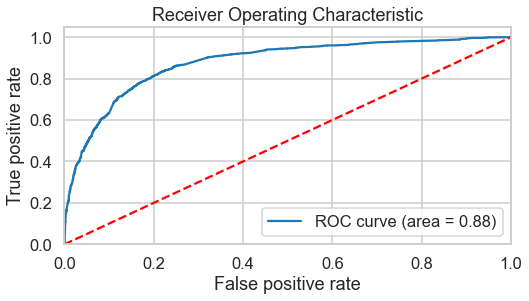

In [79]:
## Roc Curve

lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

   - We can see that curve is closer to the left side of the border than to the right side. Therefore, our model has greater accuracy.  Area under the curve is 88% of the total area (ROC curve area).


#### Optimal probability cut off

In [80]:
## Lets create columns with different probabilty cutoffs

numbers=[float(x)/10 for x in range(10)]  

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   

In [81]:
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.279680,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.278385,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.316095,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.757785,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.202654,3934,1,1,1,0,0,0,0,0,0,0


   - We need to choose any one points from 0 to 0.9, it is done by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each of these points. 
   - It will tell, whether our model is having low accuray or high or number of relevance data points is high or low.

In [82]:
# We will calculate accuracy, sensitivity and specificity using probability cutoff
# We need import necessary library for this purpose

from sklearn.metrics import confusion_matrix

#We will create a new dataframe to save the values that will be created

dataframe_cf=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in var:
    
    #confusion matrix
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i]) 
     # sum of the matrix
    total=sum(sum(cm_matrix))  
    # Storing the accuracy Data
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total  
    # Storing the sensitivity Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1]) 
    # Storing the specificity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])  
    # Inserting all the values into the new dataframe
    dataframe_cf.loc[i]=[i, accuracy, sensitivity, specificity]                           
print(dataframe_cf)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.423469    0.996756     0.070215
0.1          0.1  0.555659    0.975669     0.296852
0.2          0.2  0.698825    0.935929     0.552724
0.3          0.3  0.791589    0.862530     0.747876
0.4          0.4  0.808442    0.790754     0.819340
0.5          0.5  0.810606    0.682076     0.889805
0.6          0.6  0.780458    0.517843     0.942279
0.7          0.7  0.750000    0.392133     0.970515
0.8          0.8  0.719233    0.289132     0.984258
0.9          0.9  0.680891    0.171533     0.994753


   - In the data frame above created we will select a probability cutoff point of 0.4 as all the accuracy , sensitivity and specificity are having nearly same value.



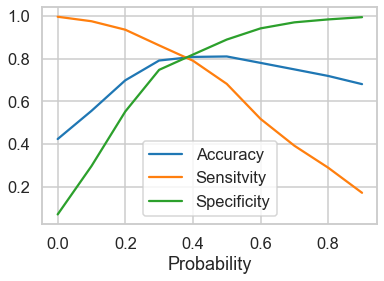

In [83]:
#We can plot to see the meeting point of accuracy' , 'sensitivity' and 'specificity' of probabilities ranging from 0 to 0.9

dataframe_cf.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   
plt.show()

   - From the above curve, 0.3 is the optimum point to take it as a cutoff probabilty

In [84]:
# We will predict the outcomes with probability cutoff as 0.4. A new dataframe is created

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )   

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.279680,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.278385,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.316095,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.757785,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.202654,3934,1,1,1,0,0,0,0,0,0,0,0


#### Precision and recall calculation on Train Data Set

In [85]:
from sklearn import metrics

In [86]:
 from sklearn.metrics import precision_score, recall_score

In [87]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8084415584415584

In [88]:
## Checking confusion matrix for train dataset

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion2

array([[3279,  723],
       [ 516, 1950]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7907542579075426

In [91]:
# Let us calculate specificity

TN / float(TN+FP)

0.8193403298350824

In [92]:
## Lets check the precision score 

precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.7295173961840629

In [93]:
## Lets check recall value

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7907542579075426

#### Inferences:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is quite good. We have the following values for the Train Data:

- Accuracy : 81%
- Sensitivity : 79%
- Specificity : 82%
- Recall : 79%
- Precision : 73%

In [94]:
#import library for finding trade off

from sklearn.metrics import precision_recall_curve

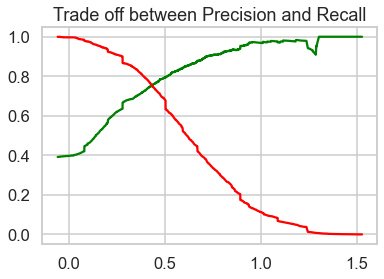

In [95]:
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")  
plt.title('Trade off between Precision and Recall')
plt.show()

   - There is a trade off between precision and recall and they meet near to 0.5

### <font color=blue> 6. Prediction and Evaluation on Test Data Set

In [96]:
## Prediction on Test Data set

test_cols=X_train_4.columns[1:]              
X_test_final=X_test[test_cols]               
X_test_final=sm.add_constant(X_test_final)   
y_pred_test=reg4.predict(X_test_final)

In [97]:
# new dataset and saving the prediction values 

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,190.319411,4269
2376,1,1.059907,2376
7766,1,11.923900,7766
9199,0,0.246366,9199
4359,1,0.835757,4359


In [98]:
## Checking final shape

y_test_pred_final.shape

(2772, 3)

###  Model Evaluation

In [99]:
#predicting with probability cutoff (0.4)


y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,190.319411,4269,1
2376,1,1.059907,2376,1
7766,1,11.923900,7766,1
9199,0,0.246366,9199,0
4359,1,0.835757,4359,1


### Assigning lead score

In [100]:
### Assigning lead score on Test data set

y_test_pred_final['Lead Number']=lead_score.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,190.319411,4269,1,0,19032
2376,1,1.059907,2376,1,0,106
7766,1,11.923900,7766,1,0,1192
9199,0,0.246366,9199,0,0,25
4359,1,0.835757,4359,1,0,84
9186,1,115.406096,9186,1,0,11541
1631,1,190.470767,1631,1,0,19047
8963,1,50.595027,8963,1,0,5060
8007,0,64.787205,8007,1,0,6479
5324,1,30.541889,5324,1,0,3054


In [101]:
## get the total of final predicted conversion or non conversion counts

checking_test_df = y_test_pred_final.loc[y_test_pred_final['Converted']==1, ['Converted', 'Predicted']]
checking_test_df['Predicted'].value_counts()

1    1065
0      30
Name: Predicted, dtype: int64

In [102]:
## Check the percentage of predicted conversion on test data

(862/(862+233)*100)

78.72146118721462

Hence We can see that the prediction of conversions have a target rate of 79% 

#### Overall Metrics - Accuracy, Recall, Precision, Speceficity and Sensitivity on Test Data Set 

In [103]:
# Let's check the overall accuracy.

print('Accuracy of Model is :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Accuracy of Model is : 0.4754689754689755


In [104]:
## Calculating Confusion Matrix

confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
confusion2

array([[ 253, 1424],
       [  30, 1065]], dtype=int64)

In [105]:
## Calculating conversion Values

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9726027397260274

In [107]:
# Let us calculate specificity

TN / float(TN+FP)

0.15086463923673227

In [108]:
## Lets check the precision value

precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.42788268380875855

In [109]:
## Checking Recall Value

recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.9726027397260274

### Business Recommendation :

### <font color=green> Summary </font> :

There are lots of lead generated in the initial stage (top) but only a few of them come out as our paying customers from the bottom.In the middle stage, you need to nurture the potential leads well in order to get higher conversion rate. First, sort out the best prospects from the leads you have generated. Here 'Total Visit', 'Total Time Spent on Websites' which contribute most towards the probabilty of a lead getting converted. Keep leads handy so that you can inform them about new courses, services, jobs offer and about higher studies in future. Focus on Converted Leads. hold Question-Answer sessions with leads to extract the right information you need about them. Make Further Enquiries and appointment with the leads to determine their intention and mentality to join online course. 

### <font color=green> Inference </font> :

   
•	Model is stable and suitable for company requirements based on following outcomes:

   1.	Accuracy, Sensitivity and Specificity values of test set are around 81%, 78% and 83% which are approximately closer to the respective values calculated using trained set.  The values are in acceptable range.

   2.	While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.

   3.	Also, the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 78%


### <font color=green> Recommendation </font> :

• Company can focus on following categories for Lead conversions:
    
   - Total Time Spent on websites. 
   - Current Occupation of the Customers in which mostly unemployed are the hot Leads.
   - In order to improve Lead Conversion Company should focus in API and Landing Page Submission Origin. 
   - Lead Source are one of the feature through which high conversion rates are observed with the help of welingak websites and olark chat.


**Hence overall this model seems to Predict the conversion very well and definetly company will make good calls based on Prediction**

In [110]:
import jovian

In [ ]:
jovian.commit(project_name = 'Lead_score', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
